

Question to answer, geographically, how do the locations of encampments compare to the reports for behavior

The source of the information is from the San Francisco Open Data Portal
On that portal, I've created a dataset of Encampments
https://data.sfgov.org/profile/Gregory/xm4t-k5h4?q=encampment&sortBy=relevance&utf8=%E2%9C%93


# San Francisco Homeless with Video





Import Libraries & get url


In [121]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt






## Setup to display images - working, work to do

In [122]:
from IPython.display import Image
from IPython.core.display import HTML 
from IPython.core.display import Image, display



## Get yesterday variable in bash and format it for url

In [123]:
yesterday = !date -d "yesterday 13:00 " '+%Y-%m-%d'
yesterday = str(yesterday)[1:-1]
print(type(yesterday))
print(yesterday)

<class 'str'>
'2016-12-15'


### get url

In [124]:
#url = 'https://data.sfgov.org/resource/gbya-e2d3.csv' // homeless
url = 'https://data.sfgov.org/resource/gbya-e2d3.csv'

#url = 'https://data.sfgov.org/resource/rme2-xgvs.csv' // graffiti
#url = 'https://data.sfgov.org/resource/rme2-xgvs.csv'

#url = 'https://data.sfgov.org/resource/3434-6x5u.csv' //mattress
#url = 'https://data.sfgov.org/resource/3434-6x5u.csv' 
modify= "?$where=opened"
operator = '>='
#date format 'year-mm-dd'
startdate = "'2016-12-01'"
startdate = yesterday
url = url + modify + operator + str(startdate)
print(url)


https://data.sfgov.org/resource/gbya-e2d3.csv?$where=opened>='2016-12-15'


## Set Display Column with wider so no problem with Media URL series

In [125]:
pd.options.display.max_colwidth=115

## create data frame

In [126]:
#df1 = pd.read_csv(url)
#df2 = pd.read_csv(url2)
#df =  pd.concat([df1,df2])

In [127]:
df = pd.read_csv(url)

In [128]:
df.shape

(38, 16)

#### wow, 5 days > 1000 reports

In [129]:
df


,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6633183,12/15/2016 09:01:10 PM,NaN,12/15/2016 09:03:08 PM,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 11TH ST and HARRISON ST,6,South of Market,"(37.7706298096818, -122.412479783263)",Voice In,NaN
1,6633030,12/15/2016 06:59:10 PM,NaN,12/15/2016 08:08:53 PM,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"2860 16TH ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.765353291362, -122.416721001111)",Open311,NaN
2,6633020,12/15/2016 06:56:13 PM,NaN,12/15/2016 08:08:51 PM,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"490 SOUTH VAN NESS AVE, SAN FRANCISCO, CA, 94103",9,Mission,"(37.765511320074, -122.417678769023)",Open311,NaN
3,6632983,12/15/2016 06:29:03 PM,NaN,12/15/2016 06:30:52 PM,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 16TH ST and FOLSOM ST,9,Mission,"(37.7653147489607, -122.415308353435)",Voice In,NaN
4,6632814,12/15/2016 05:10:46 PM,NaN,12/15/2016 07:37:22 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"304 LILY ST, SAN FRANCISCO, CA, 94102",5,Lower Haight,"(37.774160409322, -122.42606537661)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/58533f0c3da153f1b6e7c572/report.jpg
5,6632545,12/15/2016 04:07:34 PM,NaN,12/15/2016 05:26:44 PM,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1656 15TH ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.766718673102, -122.421267483133)",Open311,http://mobile311.sfgov.org/media/san_francisco/report/photos/585330353da153f1b6e7c44d/photo_20161215_160650.jpg
6,6632462,12/15/2016 03:50:35 PM,NaN,12/15/2016 05:12:14 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1873 LOMBARD ST, SAN FRANCISCO, CA, 94123",2,Union Street,"(37.800133721682, -122.432208783058)",Voice In,NaN
7,6632356,12/15/2016 03:29:09 PM,NaN,12/15/2016 03:29:09 PM,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 1ST ST and CLEMENTINA ST,6,South of Market,"(37.7877175093053, -122.395007836409)",Open311,NaN
8,6632352,12/15/2016 03:28:06 PM,NaN,12/15/2016 03:28:06 PM,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 1ST ST and CLEMENTINA ST,6,South of Market,"(37.7877175093053, -122.395007836409)",Open311,NaN
9,6632281,12/15/2016 03:13:37 PM,NaN,12/15/2016 04:55:43 PM,Open,accepted,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"1850 BRYANT ST, SAN FRANCISCO, CA, 94110",9,Mission,"(37.763745732193, -122.410466406491)",Voice In,NaN


In [130]:
df['Opened'] = pd.to_datetime(df['Opened'])
df['Closed'] = pd.to_datetime(df['Closed'])
df['Updated'] = pd.to_datetime(df['Updated'])

In [131]:
df.head(3)

,CaseID,Opened,Closed,Updated,Status,Status Notes,Responsible Agency,Category,Request Type,Request Details,Address,Supervisor District,Neighborhood,Point,Source,Media URL
0,6633183,2016-12-15 21:01:10,NaT,2016-12-15 21:03:08,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,Intersection of 11TH ST and HARRISON ST,6,South of Market,"(37.7706298096818, -122.412479783263)",Voice In,NaN
1,6633030,2016-12-15 18:59:10,NaT,2016-12-15 20:08:53,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"2860 16TH ST, SAN FRANCISCO, CA, 94103",9,Mission,"(37.765353291362, -122.416721001111)",Open311,NaN
2,6633020,2016-12-15 18:56:13,NaT,2016-12-15 20:08:51,Open,open,DPW Ops Queue,Street and Sidewalk Cleaning,Illegal Encampment,Encampment Cleanup,"490 SOUTH VAN NESS AVE, SAN FRANCISCO, CA, 94103",9,Mission,"(37.765511320074, -122.417678769023)",Open311,NaN


/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=15.0, right=15.0
  'left=%s, right=%s') % (left, right))


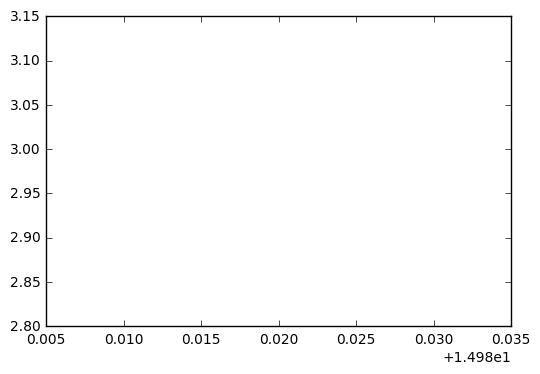

In [132]:
df.Closed.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=15.0, right=15.0
  'left=%s, right=%s') % (left, right))


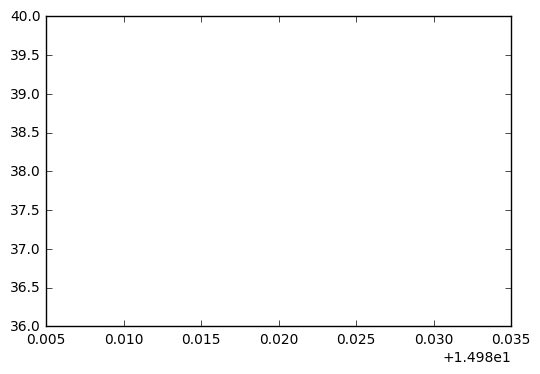

In [133]:
df.Opened.dt.day.value_counts().sort_index().plot()

/home/gdillon/.local/lib/python3.5/site-packages/matplotlib/axes/_base.py:2782: UserWarning: Attempting to set identical left==right results
in singular transformations; automatically expanding.
left=3.0, right=3.0
  'left=%s, right=%s') % (left, right))


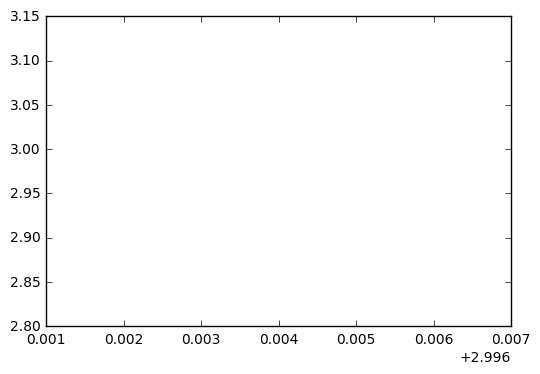

In [134]:
df.Closed.dt.weekday.value_counts().sort_index().plot()

In [135]:
df.columns

Index(['CaseID', 'Opened', 'Closed', 'Updated', 'Status', 'Status Notes',
       'Responsible Agency', 'Category', 'Request Type', 'Request Details',
       'Address', 'Supervisor District', 'Neighborhood', 'Point', 'Source',
       'Media URL'],
      dtype='object')

In [136]:

df['Request Details'].value_counts()


Encampment Cleanup    38
Name: Request Details, dtype: int64

In [137]:
df['Supervisor District'].value_counts().sort_index()



2      1
3      1
5      4
6     12
8      6
9     13
10     1
Name: Supervisor District, dtype: int64

In [138]:
df.Neighborhood.value_counts()

Mission               13
South of Market        6
Castro                 4
Showplace Square       3
Japantown              2
Duboce Triangle        2
North Beach            1
Cathedral Hill         1
Civic Center           1
Union Street           1
Tenderloin             1
Lower Haight           1
Mission Bay            1
Financial District     1
Name: Neighborhood, dtype: int64

In [139]:
#df[df.Neighborhood == 'Mission']
#df = df[df.Neighborhood == 'Mission']


### Get rid of NaN entries and display images

Need Help  https://youtu.be/2AFGPdNn4FM?t=8m

In [140]:
#hl_images = df[df['Media URL'].notnull() ]['Media URL']


In [148]:

images = df[df['Media URL'].notnull() ]['Media URL']
images = images.reset_index(drop=True)

print(images[8])


http://mobile311.sfgov.org/media/san_francisco/report/photos/5852b4c73da153f1b6e7b1b0/report.jpg


In [149]:
len(images)

13

In [150]:
images[0]

'http://mobile311.sfgov.org/media/san_francisco/report/photos/58533f0c3da153f1b6e7c572/report.jpg'

http://mobile311.sfgov.org/media/san_francisco/report/photos/5852cc373da153f1b6e7b5a6/report.jpg


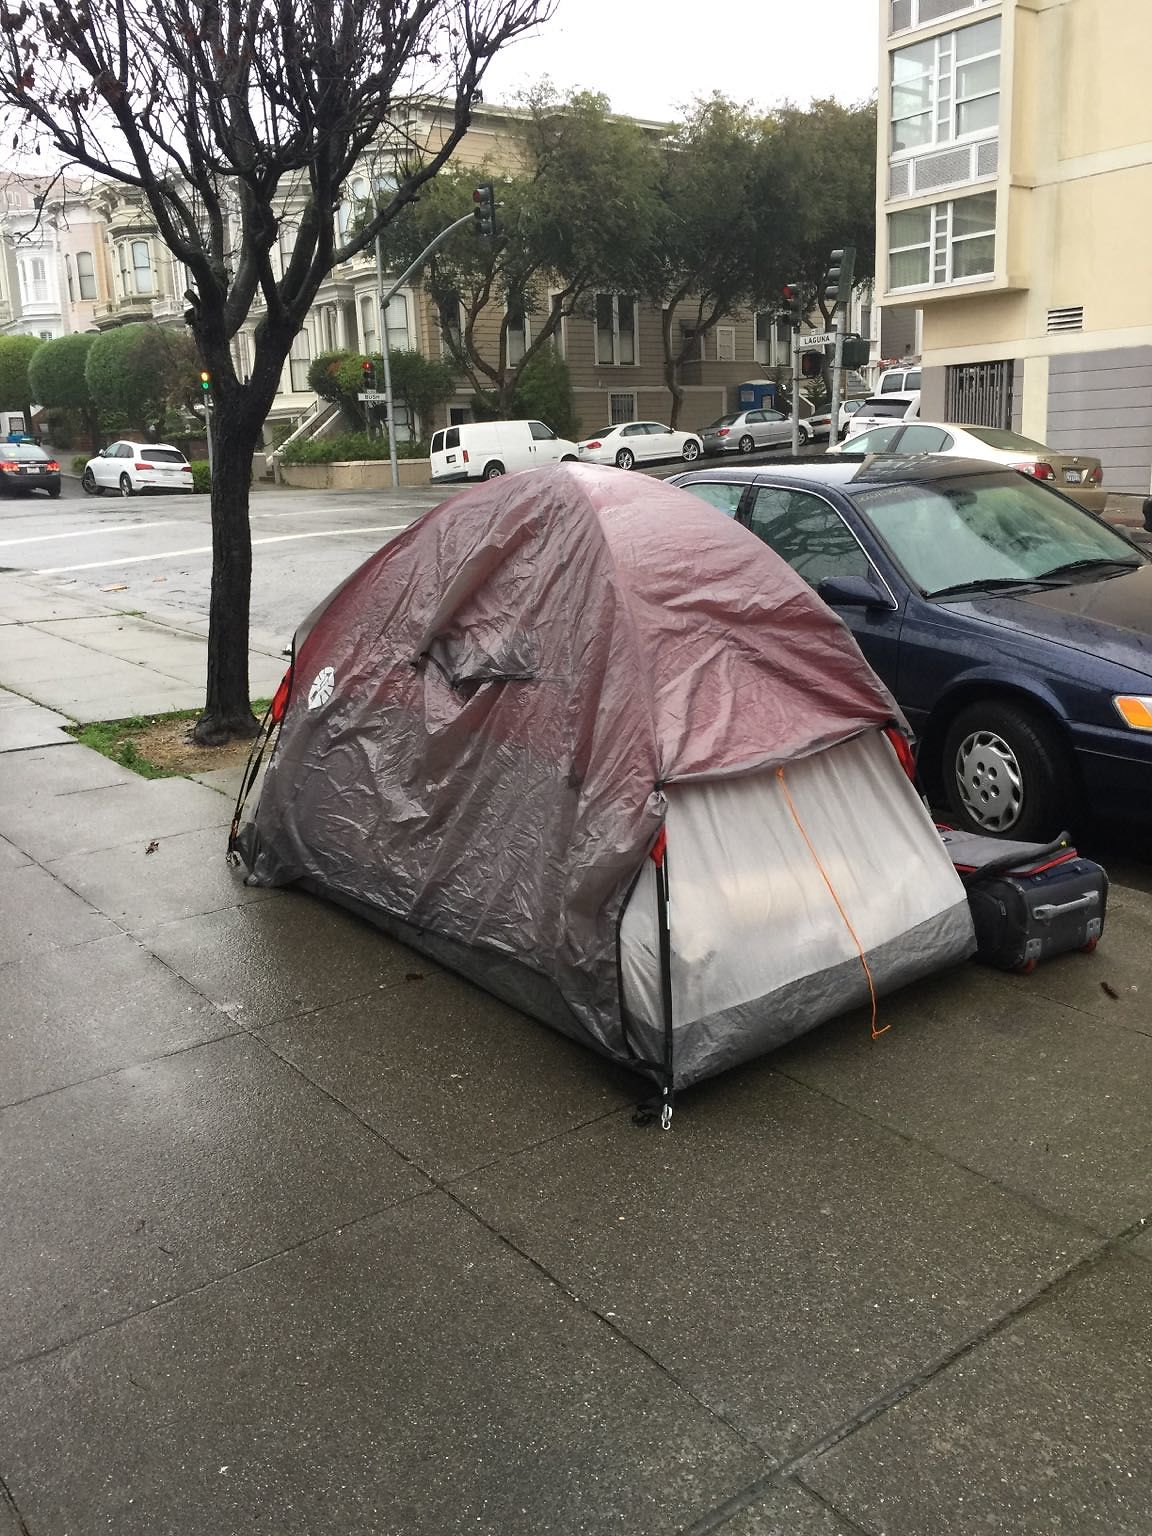

In [151]:
print(images[3])
Image(images[3])


In [152]:
!pwd

/home/gdillon/JupyterPractice/homeless_311


In [153]:
images[:180].to_csv("./imagelist.txt", index=False)

In [154]:
!yes| bash vidCreate.sh

rm: cannot remove '0*.jpg': No such file or directory
--2016-12-16 13:52:36--  http://mobile311.sfgov.org/media/san_francisco/report/photos/58533f0c3da153f1b6e7c572/report.jpg
Resolving mobile311.sfgov.org (mobile311.sfgov.org)... 54.144.250.241
Connecting to mobile311.sfgov.org (mobile311.sfgov.org)|54.144.250.241|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 305428 (298K) [image/jpeg]
Saving to: 'report.jpg'

report.jpg          100%[===================>] 298.27K   990KB/s    in 0.3s    

2016-12-16 13:52:36 (990 KB/s) - 'report.jpg' saved [305428/305428]

--2016-12-16 13:52:36--  http://mobile311.sfgov.org/media/san_francisco/report/photos/585330353da153f1b6e7c44d/photo_20161215_160650.jpg
Reusing existing connection to mobile311.sfgov.org:80.
HTTP request sent, awaiting response... 200 OK
Length: 189319 (185K) [image/jpeg]
Saving to: 'photo_20161215_160650.jpg'

photo_20161215_1606 100%[===================>] 184.88K  --.-KB/s    in 0.04s   

2016-12-16 13

In [155]:
!ls -la


total 2816
drwxrwxr-x 5 gdillon gdillon   4096 Dec 16 13:52 .
drwxrwxr-x 8 gdillon gdillon   4096 Dec 15 19:05 ..
drwxrwxr-x 2 gdillon gdillon   4096 Dec 15 19:05 .ipynb_checkpoints
-rw-rw-r-- 1 gdillon gdillon  75552 Dec 15 19:05 San+Francisco+Concerns-Homeless Aggressive behavior and well being.ipynb
-rw-rw-r-- 1 gdillon gdillon 580623 Dec 15 19:05 San+Francisco+Homeless Encampments.ipynb
-rw-rw-r-- 1 gdillon gdillon 935606 Dec 15 19:05 San+Francisco+Homeless+Data+Analysis (1).ipynb
-rw-rw-r-- 1 gdillon gdillon 240329 Dec 15 19:05 San+Francisco+Homeless+Data+Analysis.ipynb
-rw-rw-r-- 1 gdillon gdillon 305765 Dec 15 19:05 San+Francisco+Poop.ipynb
-rw-rw-r-- 1 gdillon gdillon   1278 Dec 16 13:52 imagelist.txt
drwxrwxr-x 2 gdillon gdillon   4096 Dec 16 13:52 input
drwxrwxr-x 2 gdillon gdillon   4096 Dec 15 19:27 ipynb
-rw-rw-r-- 1 gdillon gdillon 116998 Dec 16 13:52 sfOneDay.ipynb
-rw-rw-r-- 1 gdillon gdillon    221 Dec 15 19:28 vidCreate.sh
-rw-rw-r-- 1 gdillon gdillon 589200 Dec 16 13